# Artificial neural network from scratch with some visualizations


This notebook addresses the MNIST dataset using a simple Artificial Neural Network.

The performance of this NN is quite low (accuracy is ~95%), but I wanted to start with this model in order to have a baseline to compare with more sophisticated algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 1. Data retrieval & inspection

The training data set can be seen as a 42000x785 matrix, where the first column contains the label of the image and where each row of the remaining matrix is a 28x28 = 784-dimension vector obtained by unfolding a digit image.

In [2]:
data=pd.read_csv('train.csv')

In [3]:
print(data.shape)
data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_matrix = data.as_matrix()
#define label vector y and data matrix X
y_data = data_matrix[:,0]  
X_data = data_matrix[:,1:]

Let us start by displaying the first 100 digits of the data set:

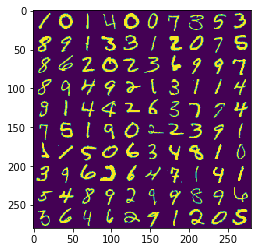

In [5]:
lbl_row = np.zeros((28, 280, 10))#10 rows of 1O images each

for j in range(10):#each row is a 28x280 image
    Xi = np.reshape(X_data[j*10 , :], (28, -1))
    for i in range (9):
        Xi = np.concatenate(( Xi, np.reshape(X_data[i + j*10 + 1, :], (28, -1))), axis = 1)
    lbl_row[:, :, j] = Xi
 
Image = lbl_row[:, :, 0]
for j in range(9):
    Image = np.concatenate((Image, lbl_row[:, :, j + 1]), axis = 0)
 
plt.imshow(Image)

The widget control below is like a sliding window allowing to browse through 100 consecutive labels.

We can see that obviously data is already randomized, so shuffling isn't necessary.

In [6]:
from ipywidgets import *
def plt_lbl(n):
    plt.plot(y_data[n:n+100])
    plt.show()
    lbl_row = np.zeros((28, 280, 10))
    
interact(plt_lbl, n = (0, 41900, 100))

<function __main__.plt_lbl>


To get an idea of what the 784-dimension vectors look like, for each class of digit we can put display the vectors side-by-side in order to form an image. Doing so is a way to check that all vectors from a same class of digit (or with the same label) look alike from each other. [I don't actually use all vectors from a same class, but only the first 700 in order to make square-ish images without having to bother with figures and aspect ratios]

In the figure below are shown randomly picked digit images for each class along with the 784-dimension vector representation of the digit class.

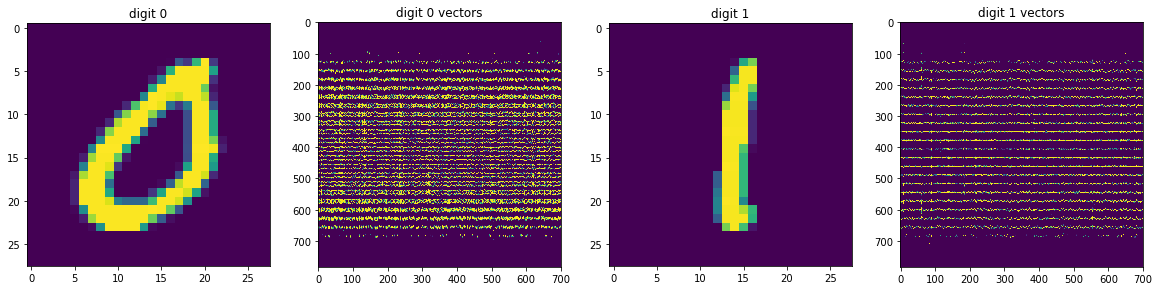

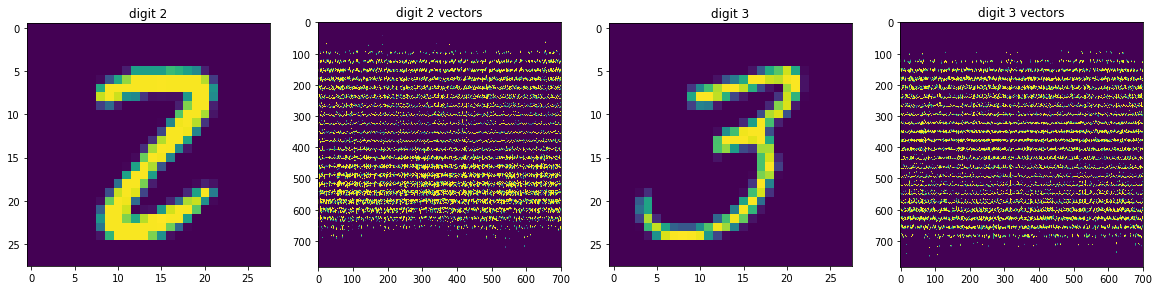

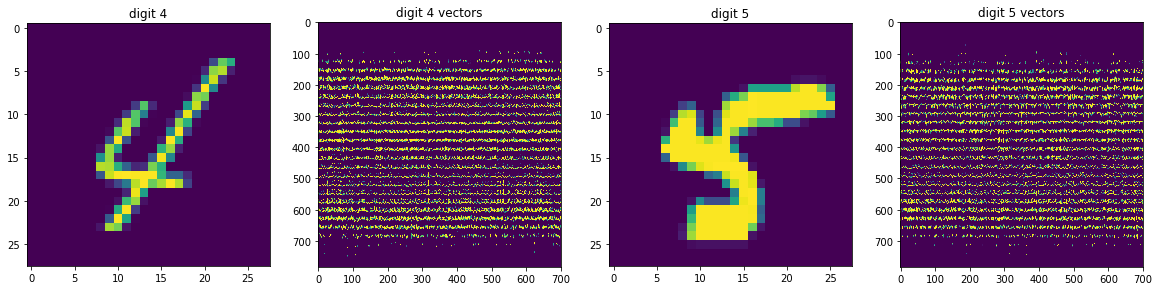

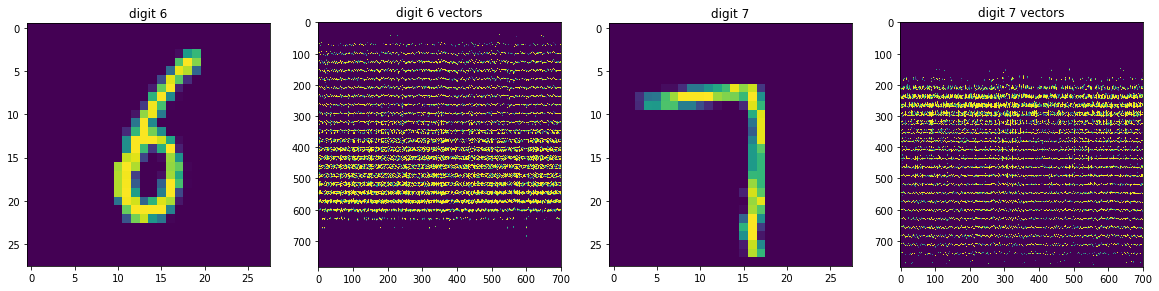

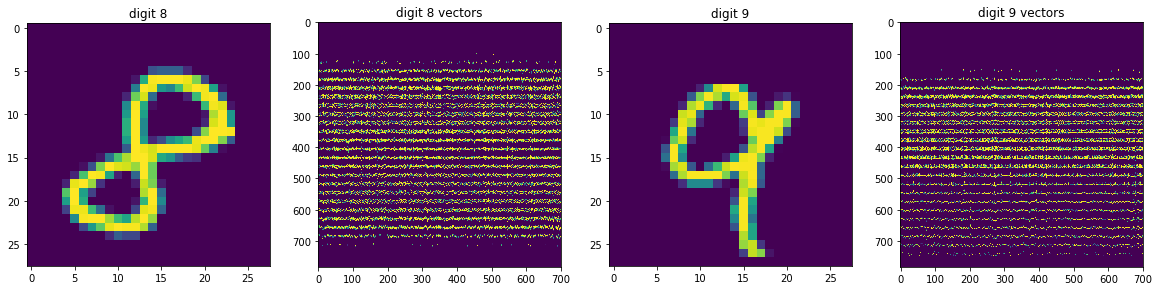

In [7]:
data_0 = data[data['label'].isin(['0'])].as_matrix()[0:700,1:]
data_1 = data[data['label'].isin(['1'])].as_matrix()[0:700,1:]
data_2 = data[data['label'].isin(['2'])].as_matrix()[0:700,1:]
data_3 = data[data['label'].isin(['3'])].as_matrix()[0:700,1:]
data_4 = data[data['label'].isin(['4'])].as_matrix()[0:700,1:]
data_5 = data[data['label'].isin(['5'])].as_matrix()[0:700,1:]
data_6 = data[data['label'].isin(['6'])].as_matrix()[0:700,1:]
data_7 = data[data['label'].isin(['7'])].as_matrix()[0:700,1:]
data_8 = data[data['label'].isin(['8'])].as_matrix()[0:700,1:]
data_9 = data[data['label'].isin(['9'])].as_matrix()[0:700,1:]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols = 4, figsize=(20,5))

ax0.imshow(np.reshape(data_0[np.random.randint(0, 700 + 1),:],(28,-1)))
ax0.set_title('digit 0')
ax1.imshow(data_0.T, aspect = 0.9)
ax1.set_title('digit 0 vectors')
ax2.imshow(np.reshape(data_1[np.random.randint(0, 700 + 1),:],(28,-1)))
ax2.set_title('digit 1')
ax3.imshow(data_1.T, aspect = 0.9)
ax3.set_title('digit 1 vectors')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols = 4, figsize=(20,5))

ax0.imshow(np.reshape(data_2[np.random.randint(0, 700 + 1),:],(28,-1)))
ax0.set_title('digit 2')
ax1.imshow(data_2.T, aspect = 0.9)
ax1.set_title('digit 2 vectors')
ax2.imshow(np.reshape(data_3[np.random.randint(0, 700 + 1),:],(28,-1)))
ax2.set_title('digit 3')
ax3.imshow(data_3.T, aspect = 0.9)
ax3.set_title('digit 3 vectors')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols = 4, figsize=(20,5))

ax0.imshow(np.reshape(data_4[np.random.randint(0, 700 + 1),:],(28,-1)))
ax0.set_title('digit 4')
ax1.imshow(data_3.T, aspect = 0.9)
ax1.set_title('digit 4 vectors')
ax2.imshow(np.reshape(data_5[np.random.randint(0, 700 + 1),:],(28,-1)))
ax2.set_title('digit 5')
ax3.imshow(data_5.T, aspect = 0.9)
ax3.set_title('digit 5 vectors')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols = 4, figsize=(20,5))

ax0.imshow(np.reshape(data_6[np.random.randint(0, 700 + 1),:],(28,-1)))
ax0.set_title('digit 6')
ax1.imshow(data_6.T, aspect = 0.9)
ax1.set_title('digit 6 vectors')
ax2.imshow(np.reshape(data_7[np.random.randint(0, 700 + 1),:],(28,-1)))
ax2.set_title('digit 7')
ax3.imshow(data_7.T, aspect = 0.9)
ax3.set_title('digit 7 vectors')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols = 4, figsize=(20,5))

ax0.imshow(np.reshape(data_8[np.random.randint(0, 700 + 1),:],(28,-1)))
ax0.set_title('digit 8')
ax1.imshow(data_8.T, aspect = 0.9)
ax1.set_title('digit 8 vectors')
ax2.imshow(np.reshape(data_9[np.random.randint(0, 700 + 1),:],(28,-1)))
ax2.set_title('digit 9')
ax3.imshow(data_9.T, aspect = 0.9)
ax3.set_title('digit 9 vectors')

Each 784-vector image has a dominant horizontal structure, showing that all columns/vectors from a same class do look like each other. So unfolding the digit images into a vector is a sensible choice.

Each class of digit has its own structure. However, looking at vector images, a 0 is quite similar to an 8, and 3s and 4s also look quite similar. On the other hand, 6 and 7 seem to exhibit stronger identities.

## 2. Defining an artificial neural network

We now define an artificial neural network with 2 hidden layers.
The design of this NN is widely inspired from Andrew Ng Machine Mearning class on Coursera, except for the minimization of the cost function which is performed using stochastic gradient descent.

In [8]:
#activation functions
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))
    
def grad_sigmoid(z):
    return sigmoid(z)*(1 - sigmoid(z))
    
def cost_function(nn_params, X, YY, lambda_):

    Theta1 = np.reshape(nn_params[0 : s2*(s1 + 1)], (s2, s1 + 1))
    Theta2 = np.reshape(nn_params[s2*(s1 + 1) : s2*(s1 + 1) + s3*(s2 + 1)],\
                                                              (s3, s2 + 1))
    Theta3 = np.reshape(nn_params[s2*(s1 + 1) + s3*(s2 + 1) : ], (s4, s3 + 1))
    
    m = np.shape(X)[0]
    J = 0
    #feedforward propagation
    a1 = X
    a2 = sigmoid(np.dot(np.c_[np.ones(m), a1], Theta1.T))
    a3 = sigmoid(np.dot(np.c_[np.ones(m), a2], Theta2.T))
    a4 = sigmoid(np.dot(np.c_[np.ones(m), a3], Theta3.T))
    #cost function, unregularized
    J = -(1/m)*np.sum( YY*np.log(a4) + (1 - YY)*np.log(1 - a4)) 
    #add regularization
    #in Theta matrices remove first column that contains bias term	
    J += (lambda_/(2*m))*(np.sum(Theta1[:,1:]**2) \
                        + np.sum(Theta2[:,1:]**2) \
                        + np.sum(Theta3[:,1:]**2)) 

    return J

def grad_theta(nn_params, x_i, yy_i, lambda_ = 3.0):

    Theta1 = np.reshape(nn_params[0 : s2*(s1 + 1)], (s2, s1 + 1))
    Theta2 = np.reshape(nn_params[s2*(s1 + 1) : s2*(s1 + 1) + s3*(s2 + 1)],\
                                                              (s3, s2 + 1))
    Theta3 = np.reshape(nn_params[s2*(s1 + 1) + s3*(s2 + 1) : ], (s4, s3 + 1))
    
    m = np.shape(x_i)[0]
    #feedforward propagation
    a1 = x_i
    a2 = sigmoid(np.dot(np.insert(a1, 0, 1), Theta1.T))
    a3 = sigmoid(np.dot(np.insert(a2, 0, 1), Theta2.T))
    a4 = sigmoid(np.dot(np.insert(a3, 0, 1), Theta3.T))
    #backward propagation
    delta_4 = a4 - yy_i
    delta_3 = np.dot(delta_4, Theta3[:,1:])\
                        *grad_sigmoid(np.dot(np.insert(a2, 0, 1), Theta2.T))
    delta_2 = np.dot(delta_3, Theta2[:,1:])\
                        *grad_sigmoid(np.dot(np.insert(a1, 0, 1), Theta1.T))
    
    Theta3_grad = (1/m)*np.outer(delta_4.T, np.insert(a3, 0, 1))
    Theta2_grad = (1/m)*np.outer(delta_3.T, np.insert(a2, 0, 1))
    Theta1_grad = (1/m)*np.outer(delta_2.T, np.insert(a1, 0, 1)) 
    #add regularization
    Theta1_grad += (lambda_/m)*(np.c_[np.zeros(s2), Theta1[:,1:]])
    Theta2_grad += (lambda_/m)*(np.c_[np.zeros(s3), Theta2[:,1:]])
    Theta3_grad += (lambda_/m)*(np.c_[np.zeros(s4), Theta3[:,1:]])

    grad = np.concatenate(
            (np.reshape(Theta1_grad, (np.shape(Theta1_grad)[0]* \
                                      np.shape(Theta1_grad)[1])), 
             np.reshape(Theta2_grad, (np.shape(Theta2_grad)[0]* \
                                      np.shape(Theta2_grad)[1])),
             np.reshape(Theta3_grad, (np.shape(Theta3_grad)[0]* \
                                      np.shape(Theta3_grad)[1]))),
                            axis = 0)
        
    return grad
    
def train_nn(X, YY, alpha, lambda_):
   
    #random initialization of Theta matrices
    epsilon_1 = np.sqrt(6/(s1+s2))
    Theta1 = 2*epsilon_1*np.random.random_sample((s2, s1 + 1)) - epsilon_1
    epsilon_2 = np.sqrt(6/(s2+s3))
    Theta2 = 2*epsilon_2*np.random.random_sample((s3, s2 + 1)) - epsilon_2
    epsilon_3 = np.sqrt(6/(s3+s4))
    Theta3 = 2*epsilon_3*np.random.random_sample((s4, s3 + 1)) - epsilon_3
    
    nn_params = np.concatenate((np.reshape(Theta1, (s2*(s1 + 1))), 
                                np.reshape(Theta2, (s3*(s2 + 1))),
                                np.reshape(Theta3, (s4*(s3 + 1)))) ,
                                axis = 0)
    
    #Stochastic gradient descent
    m = np.shape(X)[0]
    ii = 0
    J = 0
    while (ii < 10):
        for i in range(m):
            x_i = X[i,:]
            yy_i = YY[i,:]
            nn_params -= alpha*grad_theta(nn_params, x_i, yy_i, lambda_)
        J = cost_function(nn_params, X, YY, lambda_)
        print('Epoch = ', ii, '| Cost fct. = ', J)
        
        ii = ii + 1
    
    return nn_params, J

def predict(nn_params, X):
    Theta1 = np.reshape(nn_params[0 : s2*(s1 + 1)], (s2, s1 + 1))
    Theta2 = np.reshape(nn_params[s2*(s1 + 1) : s2*(s1 + 1) + s3*(s2 + 1)],\
                                                              (s3, s2 + 1))
    Theta3 = np.reshape(nn_params[s2*(s1 + 1) + s3*(s2 + 1) : ], (s4, s3 + 1))
                        
    p = np.zeros(np.shape(X)[0])
    m = np.shape(X)[0]
    #feedforward propagation
    a1 = X
    a2 = sigmoid(np.dot(np.c_[np.ones(m), a1], Theta1.T))
    a3 = sigmoid(np.dot(np.c_[np.ones(m), a2], Theta2.T))
    a4 = sigmoid(np.dot(np.c_[np.ones(m), a3], Theta3.T))
    p = np.argmax(a4, axis = 1)
    return p


## 3. Tuning model parameters

We first normalize features by substracting mean and dividing by maximum value.

In [9]:
#normalize features
X_data = X_data - np.mean(X_data, axis = 0)
X_data /= 255

We then use one quarter of the training set to define a cross-validation set.

In [10]:
#number of training examples
m = np.shape(X_data)[0]

#define train and cross-validation sets
size_t = int(np.floor(m*(3./4.)))
X_t = X_data[0:size_t,:]
y_t = y_data[0:size_t]

size_cv = m - size_t
X_cv = X_data[size_t:,:]
y_cv = y_data[size_t:]

We now define neural network parameters: we use two hidden layers. The input layer has 784 inputs, each corresponding to a pixel in the image. The first hidden layer has 100 units and the second hidden layer has 25 units. The output layer has 10 units. The unit with the highest score corresponds to thepredicted digit. 

In [11]:
#NN parameters
s1  = np.shape(X_data)[1]   #input layer size
s2 = 100 #1st hidden layer size
s3 = 25  #2nd hidden layer size
s4 = 10  #output layer size (=10 classes of digits)  

#define binary label matrices
y_k = np.arange(s4)
YY_data = np.zeros((m, s4))
YY_t = np.zeros((size_t, s4))
YY_cv = np.zeros((np.shape(y_cv)[0], s4))
for i in range(m):
    YY_data[i,:] = 1.0*(y_data[i] == y_k)
for i in range(int(size_t)):
    YY_t[i,:] = 1.0*(y_t[i] == y_k)
for i in range(int(size_cv)):
    YY_cv[i,:] = 1.0*(y_cv[i] == y_k)

We now loop over the learning rate alpha, and we'll pick the value which produces the lowest cross-validation cost.
This loop is commented and the values for test and cross validation cost functions are hard-coded in order to bypass the kernel time limit.

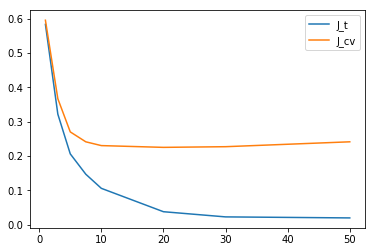

In [12]:
alpha_ = np.array([1, 3, 5, 7.5, 10, 20, 30, 50])

J_t = np.zeros(np.shape(alpha_))
J_cv = np.zeros(np.shape(alpha_))
nn_params_test = np.zeros((s2*(s1 + 1) + s3*(s2 + 1) + s4*(s3 + 1), \
                           int(np.shape(alpha_)[0])))
#print("Training NN...\n")
##find optimal lambda
#for i in range(int(np.shape(alpha_)[0])):
#    print("alpha = %.3f" % alpha_[i])
#    nn_params_test[:,i], J_t[i] = train_nn(X_t, YY_t, alpha_[i], 0.0)
#    J_cv[i] = cost_function(nn_params_test[:,i], X_cv, YY_cv, 0.0)

J_t = np.array([5.832434596367060964e-01, \
                3.217176002958767600e-01, \
                2.061229923537728770e-01, \
                1.468983090985981066e-01, \
                1.057935583045061662e-01, \
                3.769888815388108827e-02, \
                2.261514463063529420e-02, \
                1.963118559664788279e-02])

J_cv = np.array([5.953199058922009623e-01, \
                3.667054259800663907e-01, \
                2.701376540095958290e-01, \
                2.412624427965300300e-01, \
                2.302492829280909925e-01, \
                2.250976716848475667e-01, \
                2.270554072647736621e-01, \
                2.412741575616038914e-01])

plt.plot(alpha_,J_t, label = 'J_t')
plt.plot(alpha_,J_cv, label ='J_cv')
plt.legend()
plt.show()


Neural network optimal parameters are chosen from the lowest cross validation cost function. In this case it corresponds to alpha = 20.

## 4. Predictions and accuracy

We can now examine the neural network train with the optimal learning rate for the stochastic gradent descent.
Here we do one training pass with alpha = 20 and evaluate accuracy using the cross validation set we defined before.

In [13]:
##optimal regularization parameter
#alpha_opt = alpha_[np.argmin(J_cv)]
#nn_params_opt = nn_params_test[:,np.argmin(J_cv)]
#print("optimal alpha = %.2f\n" % alpha_opt)

# train NN using optimal lambda
nn_params_opt, J_opt = train_nn(X_t, YY_t, 20, 0.00)


print("Predicting CV data...\n")
pred_cv = predict(nn_params_opt, X_cv)
acc_cv = np.mean(pred_cv == y_cv)*100
print("Accuracy estimated on CV data : %.3f\n"% acc_cv)



Epoch =  0 | Cost fct. =  0.469498208864
Epoch =  1 | Cost fct. =  0.315694525623
Epoch =  2 | Cost fct. =  0.229645367536
Epoch =  3 | Cost fct. =  0.175798756721
Epoch =  4 | Cost fct. =  0.139597248646
Epoch =  5 | Cost fct. =  0.11346276595
Epoch =  6 | Cost fct. =  0.0907508585507
Epoch =  7 | Cost fct. =  0.070413526094
Epoch =  8 | Cost fct. =  0.0538384656293
Epoch =  9 | Cost fct. =  0.0408352342326
Predicting CV data...

Accuracy estimated on CV data : 97.067



Accuracy on the CV set is close to 97%, which is not too bad for a simple model like this one, but this will not get you very high on the leaderboard (expect a score around 95%).

### Neural network examination

Before taking a closer look at the results, let's try to look inside the neural network.

Layers of the neural network are related to their neighbor(s) through the Theta matrices that carry the weight information between the units of two consecutive layers. Here we have an input layer with 28x28 = 784 units, a first hidden layer with 100 units, and a second hidden layer with 25 units.
Therefore, the matrix mapping the information of the input layer to the first hidden layer has the dimension 100 x (784+1), where +1 is the bias term.

Each row of this matrix represents the combination of weights applied to each 100 unit of the hidden layer.
We can display this matrix by reshaping each row into a 28x28 (sub)-matrix. Each of these 28x28 sub-matrix represent the input to a unit of the first hidden layer.


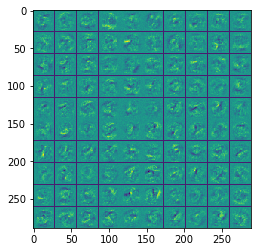

In [14]:
Theta1 = np.reshape(nn_params_opt[0 : s2*(s1 + 1)], (s2, s1 + 1))
Theta1_disp = Theta1[:,1:np.shape(Theta1)[1]]

unit_row = np.zeros((28, 280, 10))
for j in range(10):
    Xi = np.reshape(Theta1_disp[j*10 , :], (28, -1))
    for i in range(9):
        Xi = np.concatenate(( Xi, np.reshape(Theta1_disp[i + j*10 + 1, :], (28, -1))), axis = 1)
    unit_row[:, :, j] = Xi

Matrix_image = unit_row[:, :, 0]
for j in range(9):
    Matrix_image = np.concatenate((Matrix_image, unit_row[:, :, j + 1]), axis = 0)

#Add padding
Im2 = np.insert(Matrix_image, [28, 56, 84, 112, 140, 168, 196, 224, 252], -1, axis=1)
Im2 = np.insert(Im2, [28, 56, 84, 112, 140, 168, 196, 224, 252], -1, axis=0)

plt.imshow(Im2)

With some imagination, we can associate each of these images, to strokes and patterns that the network is going to try to retrieve within the input images. 

We can go on like this by displaying matrices representing mapping functions to the next layer, but these look much more abstract.

Below are "patterns" seen by the second hidden layer:

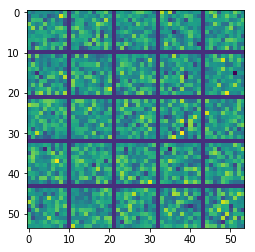

In [15]:
Theta2 = np.reshape(nn_params_opt[s2*(s1 + 1) : s2*(s1 + 1) + s3*(s2 + 1)],\
                                                              (s3, s2 + 1))
Theta2_disp = Theta2[:,1:np.shape(Theta2)[1]]

unit_row = np.zeros((10, 50, 5))

for j in range(5):
    Xi = np.reshape(Theta2_disp[j*5 , :], (10, -1))
    for i in range (4):
        Xi = np.concatenate(( Xi, np.reshape(Theta2_disp[i + j*5 + 1, :], (10, -1))), axis = 1)
    unit_row[:, :, j] = Xi

Matrix_image = unit_row[:, :, 0]
for j in range(4):
    Matrix_image = np.concatenate((Matrix_image, unit_row[:, :, j + 1]), axis = 0)

Im2 = np.insert(Matrix_image, [10, 20, 30, 40], -2,axis=1)
Im2 = np.insert(Im2, [10, 20, 30, 40], -2, axis=0)

plt.imshow(Im2)

And this is what the output layer "sees":

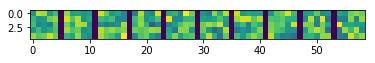

In [16]:
Theta3 = np.reshape(nn_params_opt[s2*(s1 + 1) + s3*(s2 + 1) : ], (s4, s3 + 1))
Theta3_disp = Theta3[:,1:np.shape(Theta2)[1]]

Xi = np.reshape(Theta3_disp[0 , :], (5, -1))
for i in range (9):
    Xi = np.concatenate(( Xi, np.reshape(Theta3_disp[i + 1, :], (5, -1))), axis = 1)

Im2 = np.insert(Xi, [5, 10, 15, 20, 25, 30, 35, 40, 45], -10, axis=1)

plt.imshow(Im2)

### Model evaluation

Let's take a look at the confusion matrix in order to determine for which digits errors are most likely to happen. We use logarithmic scale so that false predictions are visible in the matrix.

/home/gael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


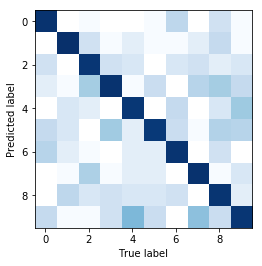

In [53]:
from sklearn.metrics import confusion_matrix

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.imshow(np.log(confusion_matrix(y_cv , pred_cv)),interpolation='nearest', cmap=plt.cm.Blues)


To examine most mistaken digits, we set diagonal elements of the confusion matrix to zero and sum over columns.

In [39]:
cm = confusion_matrix(y_cv, pred_cv)
for col in range(np.shape(cm)[1]):
    for row in range(np.shape(cm)[0]):
        if (col == row): cm[col][row]=0

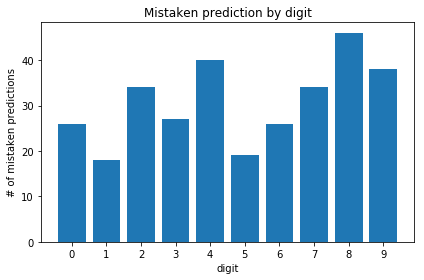

In [51]:
index = np.arange(10)

plt.bar(index, np.sum(cm,axis = 0))

plt.xlabel('digit')
plt.ylabel('# of mistaken predictions')
plt.title('Mistaken prediction by digit')
plt.xticks(np.arange(10))
plt.tight_layout()

Digits 4 and 8 are the most mistaken, which is coherent with our earlier remarks when examining 784-vectors in the fors part of this notebook. One easy way to improve the accuracy of this neural network could be to get more samples from these digits (e.g. by warping/shearing/distorting existing images).

Now let's make predictions using the test set provided:

In [72]:
#import test data
print("Reading test data...\n")
#data_test = np.genfromtxt('test.csv',delimiter=',')
data_test = pd.read_csv('test.csv')
data_test.head()

Reading test data...



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data_test_matrix = data_test.as_matrix()
#define test data matrix X
X_test = data_test_matrix[:,:]
#normalize features
X_test = X_test - np.mean(X_test, axis = 0)
X_test /= 255

#make prediction of test data using optimized NN parameters
print("Predicting from test data...\n")
pred_test = predict(nn_params_opt, X_test)

np.savetxt('submission.csv', 
           np.c_[np.arange(np.shape(pred_test)[0]) + 1, pred_test], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

print("Done")

Predicting from test data...

Done
